In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('data/clean/train.csv').set_index('PassengerId')
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Cabin_a,Cabin_b,Cabin_c,Cabin_d,Cabin_e,Cabin_f,Cabin_g,Cabin_n
PassengerId,,,,,,,,,,,,,,,,,
1,0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1.0,0.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,3.0,0.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0,3.0,1.0,35.0,0.0,0.0,8.0500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
train.shape

(889, 17)

# Data Split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x = train.iloc[:, 1:]
y = train.iloc[:, 0]

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, 
                                                  test_size = 0.15, random_state = 823, 
                                                  stratify = y)

In [7]:
(x_train.shape, y_train.shape)

((755, 16), (755,))

In [8]:
(x_val.shape, y_val.shape)

((134, 16), (134,))

# Evaluation

In [9]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

In [10]:
def model_evaluate(model):
    train_acc = round(model.score(x_train, y_train), 2)
    val_acc = round(model.score(x_val, y_val), 2)
    cv_acc = round(np.mean(cross_validate(model, x_train, y_train, cv=5)['test_score']), 2)
    
    print("Training Accuracy: {}".format(train_acc))
    print("Validation Accuracy: {}".format(val_acc))
    print("5-fold CV Accuracy: {}".format(cv_acc))

# Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
model_naive_bayes = GaussianNB().fit(x_train, y_train)
model_naive_bayes

GaussianNB(priors=None, var_smoothing=1e-09)

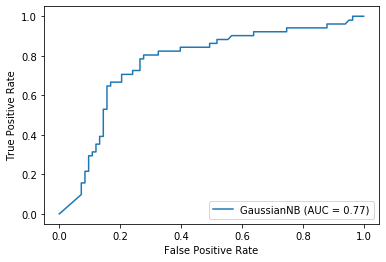

In [13]:
plot_roc_curve(model_naive_bayes, x_val, y_val)

In [14]:
confusion_matrix(y_val, model_naive_bayes.predict(x_val))

array([[71, 12],
       [30, 21]])

In [15]:
model_evaluate(model = model_naive_bayes)

Training Accuracy: 0.7
Validation Accuracy: 0.69
5-fold CV Accuracy: 0.7


# K Nearest Neighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [24]:
model_knn = KNeighborsClassifier(n_neighbors = 3).fit(x_train, y_train)
model_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [28]:
hyperparameter = {"n_neighbors": [3, 11, 21, 31, 41, 51], 
                  'weights': ['uniform', 'distance']}
knn_tuning = GridSearchCV(KNeighborsClassifier(), hyperparameter, scoring = 'accuracy').fit(x_train, y_train)
knn_tuning

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 11, 21, 31, 41, 51],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [29]:
model_knn = knn_tuning.best_estimator_
model_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='distance')

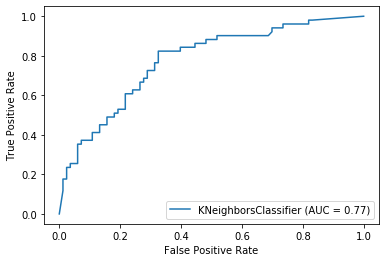

In [30]:
plot_roc_curve(model_knn, x_val, y_val)

In [31]:
confusion_matrix(y_val, model_knn.predict(x_val))

array([[66, 17],
       [24, 27]])

In [32]:
model_evaluate(model = model_knn)

Training Accuracy: 0.99
Validation Accuracy: 0.69
5-fold CV Accuracy: 0.73


# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [40]:
model_logistic_regression = LogisticRegression(max_iter = 500, random_state = 823).fit(x_train, y_train)
model_logistic_regression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=823, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

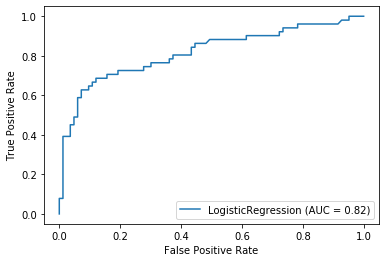

In [41]:
plot_roc_curve(model_logistic_regression, x_val, y_val)

In [42]:
confusion_matrix(y_val, model_logistic_regression.predict(x_val))

array([[70, 13],
       [16, 35]])

In [43]:
model_evaluate(model = model_logistic_regression)

Training Accuracy: 0.82
Validation Accuracy: 0.78
5-fold CV Accuracy: 0.8


# Result

In [44]:
test = pd.read_csv('data/raw/test.csv').set_index('PassengerId')
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#result.to_csv('result.csv', index = False)